# Introduction to SQL
    
In Week 1 you cleaned the data obtained from `lacity.org` that recorded details on traffic accidents.  You prepped this data to load it into a SQL database. But what we will see as we continue to analyze the data, is that there is more cleaning that needs to happen.
    
## Deliverables:
- Submit two files that has the name <span style='color:red'><b> YourLastName_Exercise_2: </span></b>
    1. Your **HTML** file that has your Source code and output
    2. Your **ipynb script** that has your Source code and output
    
## Objectives:
In this exercise you will use data cleaned from Week 1 of our class:
- Load data from csv file into a DataFrame Object
- Analyze the data using SQL and Python
- Use sqlalchemy to load data stored in a DataFrame object into SQLite database engine
- Use sqlalchemy to connect to SQLite database engine to execute SQL queries
- Execute different SQL queries


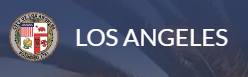

https://data.lacity.org/Public-Safety/Traffic-Collision-Data-from-2010-to-Present/d5tf-ez2w

### Structured Query Language (SQL) versus Python

The discussion board this week has you comparing the use of SQL to a general purpose language like Python.  What you will be able to test out this week in the homework is the mixing/matching of using SQL and Python to analyze data.

In [1]:
# load libraries
import pandas as pd
import numpy as np
# https://docs.sqlalchemy.org/en/13/intro.html
import sqlalchemy
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import seaborn as sns

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# ------------------------------------------------------
# read in file from Week 1
# ------------------------------------------------------
df = pd.read_csv("Final Traffic.csv")

# check out fields
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559415 entries, 0 to 559414
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DR_Number           559415 non-null  int64  
 1   Date                559415 non-null  object 
 2   Time Occurred       559415 non-null  int64  
 3   Division            559415 non-null  object 
 4   Reporting_District  559415 non-null  int64  
 5   Age                 559415 non-null  int64  
 6   Gender              550645 non-null  object 
 7   Descent             549771 non-null  object 
 8   Location            559415 non-null  object 
 9   Year                559415 non-null  int64  
 10  Month               559415 non-null  object 
 11  Day                 559415 non-null  object 
 12  Hour                559415 non-null  int64  
 13  imputeAge           559415 non-null  bool   
 14  Latitude            559415 non-null  float64
 15  Longitude           559415 non-nul

In [3]:
# look at the first 5 records
df.head()

,DR_Number,Date,Time Occurred,Division,Reporting_District,Age,Gender,Descent,Location,Year,Month,Day,Hour,imputeAge,Latitude,Longitude
0,190319651,08/24/2019,450,Southwest,356,22,M,H,"(34.0255, -118.3002)",2019,08/24/2019,08/24/2019,450,False,34.0255,-118.3002
1,190319680,08/30/2019,2320,Southwest,355,30,F,H,"(34.0256, -118.3089)",2019,08/30/2019,08/30/2019,2320,False,34.0255,-118.3002
2,190413769,08/25/2019,545,Hollenbeck,422,40,M,X,"(34.0738, -118.2078)",2019,08/25/2019,08/25/2019,545,False,34.0255,-118.3002
3,190127578,11/20/2019,350,Central,128,21,M,H,"(34.0492, -118.2391)",2019,11/20/2019,11/20/2019,350,False,34.0255,-118.3002
4,190319695,08/30/2019,2100,Southwest,374,49,M,B,"(34.0108, -118.3182)",2019,08/30/2019,08/30/2019,2100,False,34.0255,-118.3002


### Load traffic data into a table in a SQLite database

- we are creating a database called `LAtraffic`
- we are creating a table called `traffic`


In [4]:
# 'engine' will be used to reference the database
engine = create_engine('sqlite:///LAtraffic.db')

df.to_sql('traffic', engine, if_exists = 'replace', index = False)
# check out columns in table
pd.read_sql_table('traffic', engine).columns

559415

Index(['DR_Number', 'Date', 'Time Occurred', 'Division', 'Reporting_District',
       'Age', 'Gender', 'Descent', 'Location', 'Year', 'Month', 'Day', 'Hour',
       'imputeAge', 'Latitude', 'Longitude'],
      dtype='object')

### Next read in the MO file we created earlier in the class and add to the database

- we are creating a table in the `LAtraffic` database called `MO_accident`

In [5]:
# specify that the codes column is a string, not an int so we don't lose leading zeros
mo = pd.read_csv("MO per accident.csv",dtype = {'MO_Codes':'str'})

mo.to_sql('MO_accident', engine, if_exists = 'replace', index = False)
# check out columns in table
pd.read_sql_table('MO_accident', engine).columns

3101766

Index(['DR_Number', 'MO_Codes'], dtype='object')

### Now read in a file that contains all MO codes and a description of what they mean

- we are creating a table in the `LAtraffic` database called `MO_master`

In [6]:
# specify that the codes column is a string, not an int so we don't lose leading zeros
mo_mast = pd.read_csv("MO master.csv", dtype = {'Codes':'str'})

mo_mast.to_sql('MO_master', engine, if_exists = 'replace', index = False)
# check out the columns
pd.read_sql_table('MO_master', engine).columns

777

Index(['Codes', 'Description'], dtype='object')

### You can see the three tables that are now saved into the `LAtraffic` database

In [7]:
from sqlalchemy import schema
xMetaData = schema.MetaData(bind = engine)
xMetaData.reflect()
# will show table names
xMetaData.tables.keys()

dict_keys(['MO_accident', 'MO_master', 'traffic'])

### Simple query using * to select all columns

- Clean, easy-to-read code has main query commands each on a new line (SELECT and FROM on separate lines)
- SELECT specifies the columns in a table
- FROM specifies the table name
- engine refers to the database named in the create_engine cell

In [8]:
# using pandas read_sql_query returns a dataframe
q1 = pd.read_sql_query("SELECT * \
                        FROM MO_accident", engine)
q1.head(10)

,DR_Number,MO_Codes
0,190319651,3036
1,190319651,3004
2,190319651,3026
3,190319651,3101
4,190319651,4003
5,190319680,3037
6,190319680,3006
7,190319680,3028
8,190319680,3030
9,190319680,3039


In [9]:
# same query, but you can choose to have query string separate
qstring = "SELECT * \
           FROM MO_accident"
q1a = pd.read_sql_query(qstring, engine)
q1a.head()

,DR_Number,MO_Codes
0,190319651,3036
1,190319651,3004
2,190319651,3026
3,190319651,3101
4,190319651,4003


In [10]:
# can use three single quotes and then no need for \ for line continuation
query = '''SELECT * 
           FROM MO_accident'''
q1b = pd.read_sql_query(query, engine)
q1b.head()

,DR_Number,MO_Codes
0,190319651,3036
1,190319651,3004
2,190319651,3026
3,190319651,3101
4,190319651,4003


### Using SELECT for specific fields

- can individually pull out specific fields

In [11]:
q2 = pd.read_sql_query("SELECT Division, Gender, Age \
                        FROM traffic", engine)
q2.head(10)

,Division,Gender,Age
0,Southwest,M,22
1,Southwest,F,30
2,Hollenbeck,M,40
3,Central,M,21
4,Southwest,M,49
5,Hollenbeck,M,60
6,Harbor,M,73
7,Southwest,M,39
8,Southwest,M,48
9,Hollenbeck,M,68


### Can count and group the results

- `Count(*)` will count the rows that qualify
- `AS` allows you to rename the result to a more user friendly column name (in this example 'Accidents')
- `GROUP BY` is how the counts are accumulated - in this case by MO_Codes

**SQL Aggregate Functions**
- COUNT:  returns number of values in a specific column
- SUM: returns the sum of the values in a specific column
- AVG: returns the average of the values in a specific column
- MIN: returns the smallest value in a specific column
- MAX: returns the largest value in a specific column

In [12]:
# count of MO codes
q3 = pd.read_sql_query("SELECT MO_Codes, count(*) AS Accidents \
                        FROM MO_accident \
                        GROUP BY MO_Codes ", engine)
q3

,MO_Codes,Accidents
0,0100,5
1,0101,947
2,0102,21
3,0103,6
4,0104,8
...,...,...
326,4024,4814
327,4025,35163
328,4026,81009
329,4027,59379


### ORDER BY will determine the output order

In [13]:
# count of MO codes
q4 = pd.read_sql_query("SELECT MO_Codes, count(*) AS Count \
                        FROM MO_accident \
                        GROUP BY MO_Codes \
                        ORDER BY Count DESC", engine)
q4

,MO_Codes,Count
0,3101,409889
1,3701,335720
2,3401,335664
3,3004,244637
4,3037,218643
...,...,...
326,0316,1
327,0310,1
328,0309,1
329,0118,1


### Check out the MO_master table

In [14]:
# what is in the MO_master table?
query = "SELECT * \
         FROM MO_master"
q5 = pd.read_sql_query(query, engine)
q5.head(10)

,Codes,Description
0,0100,Suspect Impersonate
1,0101,Aid victim
2,0102,Blind
3,0103,Crippled
4,0104,Customer
5,0105,Delivery
6,0106,Doctor
7,0107,God
8,0108,Infirm
9,0109,Inspector


### Joining two tables using WHERE clause

- in the `WHERE` line below we are joining the **MO_accident** table with the **MO_master** table
- the two tables are being joined on the MO_Codes column of the MO_accident table and the Codes column of the MO_master table
- this type of join is called an Inner Join

<div>
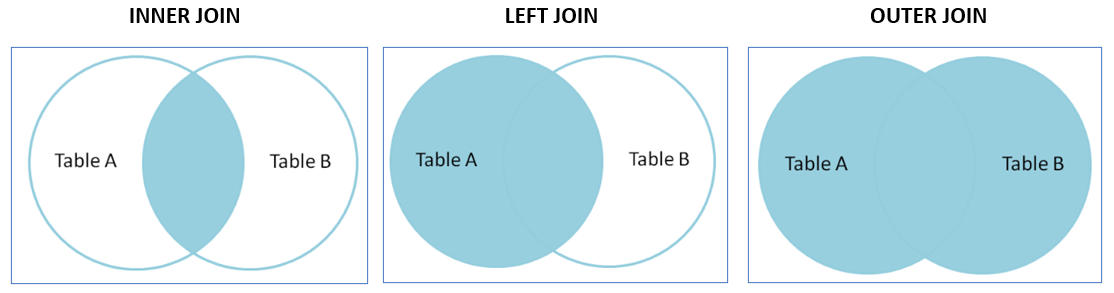
</div>


<div>
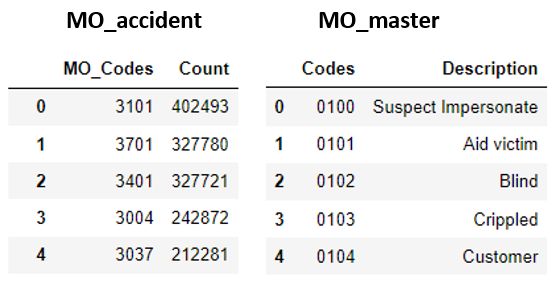
</div>


In [15]:
# look at MO codes with descriptions
q6 = pd.read_sql_query("SELECT MO_Codes, Description, count(*) AS Count \
                        FROM MO_accident a, MO_master m \
                        WHERE a.MO_Codes = m.Codes \
                        GROUP BY MO_Codes \
                        ORDER BY Count DESC", engine)
q6.head(20)

,MO_Codes,Description,Count
0,3101,T/C - PCF (A) In the Narrative,409889
1,3701,T/C - Movement Preceding Collision,335720
2,3401,T/C - Type of Collision,335664
3,3004,T/C - Veh vs Veh,244637
4,3037,T/C - At Intersection - No,218643
5,3030,T/C - Hit and Run Misd,187426
6,3028,T/C - (N) Non Injury,153873
7,3026,T/C - (C) Complaint of Injury,135474
8,3036,T/C - At Intersection - Yes,117924
9,3006,T/C - Veh vs Parked Veh,105424


### Using JOIN to connect two tables

In [16]:
# same query as above but using JOIN to connect the tables
q6a = pd.read_sql_query("SELECT Mo_Codes, Description, count(*) AS Count \
                        FROM MO_accident a \
                        JOIN MO_master m ON a.MO_Codes = m.Codes \
                        GROUP BY MO_Codes \
                        ORDER BY Count DESC", engine)
q6a.head(20)

,MO_Codes,Description,Count
0,3101,T/C - PCF (A) In the Narrative,409889
1,3701,T/C - Movement Preceding Collision,335720
2,3401,T/C - Type of Collision,335664
3,3004,T/C - Veh vs Veh,244637
4,3037,T/C - At Intersection - No,218643
5,3030,T/C - Hit and Run Misd,187426
6,3028,T/C - (N) Non Injury,153873
7,3026,T/C - (C) Complaint of Injury,135474
8,3036,T/C - At Intersection - Yes,117924
9,3006,T/C - Veh vs Parked Veh,105424


### Using WHERE to select a subset of data

- equals: =
- not equals: <> or != 
- is less than: <
- is greater than: >
- is less than or equal to: <= 
- is greater than or equal to: >=

In [17]:
# isolating 2010 data
q7 = pd.read_sql_query("SELECT Month, count(DR_Number) AS Count \
                        FROM traffic \
                        WHERE Year = 2010 \
                        GROUP BY Month \
                        ORDER BY Month", engine)
q7

,Month,Count
0,01/01/2010,122
1,01/02/2010,78
2,01/03/2010,96
3,01/04/2010,101
4,01/05/2010,110
...,...,...
360,12/27/2010,100
361,12/28/2010,95
362,12/29/2010,91
363,12/30/2010,120


### Logical Operators

- `AND`, `OR` and `NOT`
- Expressions are evaluated left to right
- Subexpressions in brackets are evaluated first
- NOT is evaluated before AND and OR
- AND is evaluated before OR

In [18]:
# isolating 2010 data along with Jan, Feb and March
q7a = pd.read_sql_query("SELECT Month, count(DR_Number) AS Count \
                        FROM traffic \
                        WHERE Year < 2011 AND Month < 4\
                        GROUP BY Month \
                        ORDER BY Month", engine)
q7a

,Month,Count
0,01/01/2010,122
1,01/02/2010,78
2,01/03/2010,96
3,01/04/2010,101
4,01/05/2010,110
...,...,...
360,12/27/2010,100
361,12/28/2010,95
362,12/29/2010,91
363,12/30/2010,120


### BETWEEN and NOT BETWEEN

- Note that BETWEEN values are inclusive with month 1, 2, 3 and 4 qualifying with the query below.



In [19]:
# isolating 2010 data
q7b = pd.read_sql_query("SELECT Month, count(DR_Number) AS Count \
                         FROM traffic \
                         WHERE Year < 2011 AND Month BETWEEN 1 and 4\
                         GROUP BY Month \
                         ORDER BY Month", engine)
q7b

,Month,Count
0,10/01/2010,157
1,10/02/2010,150
2,10/03/2010,123
3,10/04/2010,177
4,10/05/2010,125
...,...,...
87,12/27/2010,100
88,12/28/2010,95
89,12/29/2010,91
90,12/30/2010,120


### IN and NOT IN

- Tests whether a data value matches one of a list of values
- Must be an exact match

In [20]:
q8 = pd.read_sql_query("SELECT Mo_Codes, Description, count(*) AS Count \
                        FROM MO_accident a, MO_master m \
                        WHERE a.MO_Codes = m.Codes AND \
                        Description IN ('T/C - Hit and Run Misd')\
                        GROUP BY MO_Codes \
                        ORDER BY Count DESC", engine)
q8.head(20)

,MO_Codes,Description,Count
0,3030,T/C - Hit and Run Misd,187426


### LIKE and NOT LIKE

- Searces for a string appearing somewhere within the data column

In [21]:
q9 = pd.read_sql_query("SELECT Mo_Codes, Description, count(*) AS Count \
                        FROM MO_accident a, MO_master m \
                        WHERE a.MO_Codes = m.Codes AND \
                        Description LIKE '%Hit%' \
                        GROUP BY MO_Codes \
                        ORDER BY Count DESC", engine)
q9.head(20)

,MO_Codes,Description,Count
0,3030,T/C - Hit and Run Misd,187426
1,3029,T/C - Hit and Run Fel,43008
2,0416,Hit-Hit w/ weapon,78
3,1207,Hitchhiker,1
4,0450,Suspect shot at victim (no hits),1


### Let's use Latitutude and Longitude to do a quick analysis of accuracy of location data

### Cleaning data is iterative process

- the Latitude edges to Los Angeles appear to be 34.4 and 33.6
- the Longitude edges appear to be -118.7 and -118.1
- there are some outliers in our make shift map that need to be removed

In [22]:
z1 = pd.read_sql_query("SELECT Latitude, Longitude, Division \
                        FROM traffic", engine)
z1.head()


,Latitude,Longitude,Division
0,34.0255,-118.3002,Southwest
1,34.0255,-118.3002,Southwest
2,34.0255,-118.3002,Hollenbeck
3,34.0255,-118.3002,Central
4,34.0255,-118.3002,Southwest


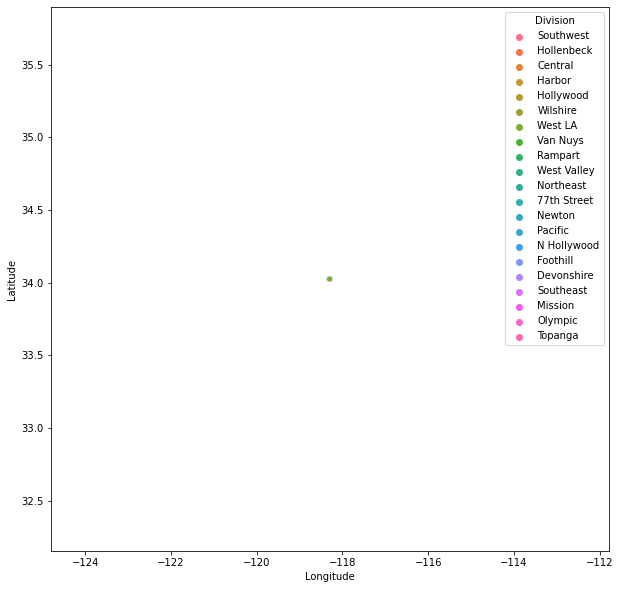

In [23]:
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.scatterplot(x = 'Longitude', y = 'Latitude', hue = "Division", data = z1, legend = 'full')

### The query below is selecting the data using SQL, but then using Python to summarize the findings

In [24]:
# query example used for homework requirement 1
q10 = pd.read_sql_query("SELECT Division \
                         FROM traffic", engine)

# now using python to summarize
q10['Division'].value_counts()

77th Street    37280
Southwest      33073
Wilshire       31669
Olympic        29489
N Hollywood    29467
West LA        29449
Pacific        29103
Newton         28531
Van Nuys       27893
Devonshire     27311
Hollywood      27077
West Valley    27007
Northeast      24916
Mission        24419
Southeast      24260
Topanga        23819
Central        22630
Harbor         21068
Rampart        21054
Hollenbeck     20252
Foothill       19648
Name: Division, dtype: int64

<div class="alert alert-block alert-warning">
    
## Requirements:
Answer the homework questions below.  Add cells as needed. Make sure all cells are run before you save to HTML.
</div>

<div class="alert alert-block alert-warning"> 
    <b> Requirement 1 : (5 points) </b> Using <b>SQL query only</b>, produce output similar to value_counts output that shows Division and the count for each division with the highest count shown first (see output for q10). 
    
   


</div>

In [25]:
import sqlite3

def run_sql(query):
    con = sqlite3.connect('LAtraffic.db')
    cur = con.cursor()
    data = []
    for row in cur.execute(query):
        data.append(row)
    con.close()
    return data
    
query = "select division, count(*) as division_counts from traffic group by division order by division_counts desc;"
run_sql(query)

[('77th Street', 37280),
 ('Southwest', 33073),
 ('Wilshire', 31669),
 ('Olympic', 29489),
 ('N Hollywood', 29467),
 ('West LA', 29449),
 ('Pacific', 29103),
 ('Newton', 28531),
 ('Van Nuys', 27893),
 ('Devonshire', 27311),
 ('Hollywood', 27077),
 ('West Valley', 27007),
 ('Northeast', 24916),
 ('Mission', 24419),
 ('Southeast', 24260),
 ('Topanga', 23819),
 ('Central', 22630),
 ('Harbor', 21068),
 ('Rampart', 21054),
 ('Hollenbeck', 20252),
 ('Foothill', 19648)]

<div class="alert alert-block alert-warning"> 
<b> Requirement 2 : (5 points) </b>  Show the minimum, maximum and mean values for the Age column.  Do this only using <b>SQL</b>.
    
   


</div>

In [26]:
query = "select min(age), max(age), avg(age) from traffic;"
run_sql(query)

[(10, 98, 40.30002770751589)]

<div class="alert alert-block alert-warning"> 
<b> Requirement 3 : (5 points) </b>  Find all Divisions with the word 'west' within the division title. Show the number of accidents in these Divisions.  Do this only using <b>SQL</b>. Sort with highest accident count showing on top.
    
   


</div>

In [27]:
query = """
select
    Division,
    count(MO_Codes) as num_accidents 
from traffic 
left join MO_accident on traffic.DR_Number = MO_accident.DR_Number 
where division like '%west%' 
group by Division 
order by num_accidents desc;
"""
run_sql(query)

[('West LA', 195927), ('West Valley', 161692), ('Southwest', 127250)]

<div class="alert alert-block alert-warning"> 
<b> Requirement 4: (10 points) </b> Let's analyze the accidents for teenagers, 16 to 19, and for the older group over 80.

1. Use SQL to select those in the age ranges described.
2. Based on percentage, how does the younger group differ from the older group by Gender? (Answer with Python)
3. Based on percentage, how does the younger group differ from the older group by Descent? (Answer with Python)
    
   


</div>

In [28]:
def grouped_count(col, teenagers=True):
    cond = "age > 15 and age < 20" if teenagers else "age > 80"
    query = f"""
    select {col}, count(*) 
        from traffic 
        where {cond}
        group by {col};
    """
    return run_sql(query)

def to_percent(data):
    total = sum(x[1] for x in data)
    return {k: v / total * 100 for k, v in data}


gender_16_19 = grouped_count('gender')
gender_80 = grouped_count('gender', False)
g_p_16_19 = to_percent(gender_16_19)
g_p_80 = to_percent(gender_80)
print(g_p_16_19)
print(g_p_80)
print("\n\n")
descent_16_19 = grouped_count('descent')
descent_80 = grouped_count('descent')
print(to_percent(descent_16_19))
print(to_percent(descent_80))



{None: 18.24906160300287, 'F': 15.70986972841687, 'M': 33.46213292117465, 'X': 32.57893574740561}
{None: 0.2637889688249401, 'F': 41.3189448441247, 'M': 58.20143884892086, 'X': 0.2158273381294964}



{None: 19.15433870611614, 'A': 0.8831971737690439, 'B': 5.243983219253699, 'C': 0.08831971737690439, 'F': 0.07727975270479134, 'H': 20.832413336277327, 'K': 0.07727975270479134, 'O': 11.227644071538972, 'U': 0.044159858688452194, 'W': 7.0655773901523515, 'X': 35.29476705674542, 'Z': 0.011039964672113049}
{None: 19.15433870611614, 'A': 0.8831971737690439, 'B': 5.243983219253699, 'C': 0.08831971737690439, 'F': 0.07727975270479134, 'H': 20.832413336277327, 'K': 0.07727975270479134, 'O': 11.227644071538972, 'U': 0.044159858688452194, 'W': 7.0655773901523515, 'X': 35.29476705674542, 'Z': 0.011039964672113049}


<div class="alert alert-block alert-warning"> 
<b> Requirement 5 : (5 points) </b> Let's do an analysis on Hit and Run accidents. We saw that there are two MO codes that represent Hit and Run - 3029 and 3030. 
   
1. Use SQL to query all accidents with codes 3029 or 3030 along with the Division where the accident occurred.   
2. Compare the top 5 Divisions in Requirement 1 that included all accidents to the top 5 Divisions with Hit and Run accidents. How do these differ?
    
   


</div>

In [29]:
query = """
    select
        Division,
        count(MO_Codes) as Hit_Run 
    from traffic 
    left join MO_accident on traffic.DR_Number = MO_accident.DR_Number 
    where MO_Codes = 3029 OR MO_Codes = 3030 
group by Division 
order by hit_run desc limit 5;
"""
hit_run_top5 = run_sql(query)

query = """select
    division,
    count(*) as division_counts
    from traffic
    group by division
    order by division_counts desc
    limit 5;"""
total_top5 = run_sql(query)

print(hit_run_top5)
print(total_top5)

[('77th Street', 16526), ('Southwest', 13440), ('Newton', 13282), ('Olympic', 12637), ('Wilshire', 12634)]
[('77th Street', 37280), ('Southwest', 33073), ('Wilshire', 31669), ('Olympic', 29489), ('N Hollywood', 29467)]


<div class="alert alert-block alert-warning"> 
<b> Requirement 6 : (5 points) </b>  Use SQL to only select valid latitudes and longitudes.  Once you have the data, use matplotlib to plot latitude, longitude and use the Division for hue.
    
- the Latitude edges to Los Angeles appear to be 34.4 and 33.6
- the Longitude edges appear to be -118.7 and -118.1
    
   


</div>

       Division  Latitude  Longitude
0   77th Street   34.0255  -118.3002
1       Central   34.0255  -118.3002
2    Devonshire   34.0255  -118.3002
3      Foothill   34.0255  -118.3002
4        Harbor   34.0255  -118.3002
5    Hollenbeck   34.0255  -118.3002
6     Hollywood   34.0255  -118.3002
7       Mission   34.0255  -118.3002
8   N Hollywood   34.0255  -118.3002
9        Newton   34.0255  -118.3002
10    Northeast   34.0255  -118.3002
11      Olympic   34.0255  -118.3002
12      Pacific   34.0255  -118.3002
13      Rampart   34.0255  -118.3002
14    Southeast   34.0255  -118.3002
15    Southwest   34.0255  -118.3002
16      Topanga   34.0255  -118.3002
17     Van Nuys   34.0255  -118.3002
18      West LA   34.0255  -118.3002
19  West Valley   34.0255  -118.3002
20     Wilshire   34.0255  -118.3002


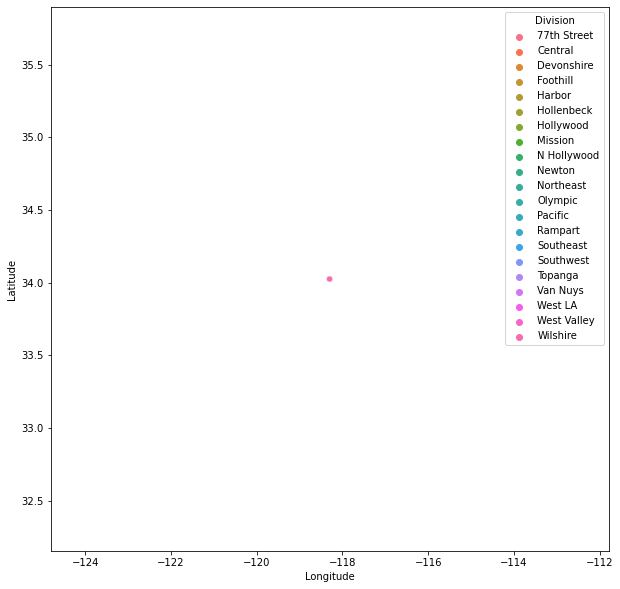

In [30]:
query = """
    select
        Division,
        Latitude,Longitude  
    from traffic 
group by Division;
"""
z1 = run_sql(query)
z1 = pd.DataFrame(z1, columns=['Division', 'Latitude', 'Longitude'])
print(z1)
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.scatterplot(x = 'Longitude', y = 'Latitude', hue = "Division", data = z1, legend = "full")

<div class="alert alert-block alert-warning"> 
<b> Requirement 7: (5 points) </b>  Are the imputed records the same as the non-imputed records?  Select imputeAge, Gender and Descent.

- Compare Gender for imputeAge (imputed vs non-imputed records). Would you consider the imputed records to be similar to non-imputed in regards to Gender?
- Compare Descent for imputeAge (imputed vs non-imputed records). Would you consider the imputed records to be similar to non-imputed in regards to Descent?
    
   


</div>

In [31]:
from collections import defaultdict

query = """
    select
        count(*),
        imputeage,
        Gender
    from traffic
    group by gender, imputeage
"""
data = run_sql(query)
result = defaultdict(lambda: defaultdict(int))
for row in data:
    result[row[2]][row[1]] = row[0]
    
for g, values in result.items():
    print(g, values[1] / values[0] * 100)

query = """
    select
        count(*),
        imputeage,
        Descent
    from traffic
    group by Descent, imputeage
"""
data = run_sql(query)

result = defaultdict(lambda: defaultdict(int))
for row in data:
    result[row[2]][row[1]] = row[0]
    
for g, values in result.items():
    print(g, values[1] / values[0] * 100) 

None 0.3202928391672386
F 0.0913989755698155
M 0.1425817458411091
X 0.059261210245604795
None 0.2911813643926789
- 0.0
A 0.02920560747663551
B 0.12975026418223895
C 0.1176470588235294
D 0.0
F 0.12099213551119178
G 0.0
H 0.19333057146802665
I 0.0
J 0.0
K 0.0
L 0.0
O 0.07442099185218451
P 0.0
S 0.0
U 0.0
V 0.0
W 0.062402736475555075
X 0.0471253534401508
Z 0.0
